<div align=right>
    <img align="right" src="figs/logo-iris-hep.png" width="100"/>
    <img align="right" src="figs/logo - UW.png" width="100"/>
</div>

# Introduction to Machine Learning

## Gordon Watts (University of Washington)
gwatts@uw.edu

Slack

<br>
<br>

### Dec 2023 - NISER

## Start your Binder!
<div>
<img align="right" src="figs/rocket-launch-india.png" width=200>
</div>

<br>
<br>

You can find the link in multiple places:

* The link is in [indico](https://indico.cern.ch/event/1328624/)
* Click here: [binder-link](https://binderhub.ssl-hep.org/v2/gh/gordonwatts/hsf-india-ml-tutorial-2023-12/main)
* In the [github repo](https://github.com/gordonwatts/hsf-india-ml-tutorial-2023-12), under the notebook labeled `00-intro`.
* Copy/paste: https://binderhub.ssl-hep.org/v2/gh/gordonwatts/hsf-india-ml-tutorial-2023-12/mai

## Brief History

<br>
<br>

* Started as a mamber of the CDF and DZERO collaborations
  * Was lucky enough to be part of the top quark discovery!
* Joined the [University of Washington](https://phys.washington.edu) in 1999 as a [professor](https://phys.washington.edu/people/gordon-watts)
* Then joined the ATLAS collaboration
  * I've been looking for long-lived particles ever since.
  * An analysis that lives/dies by Machine Learning.

<div>
    <img align=right src="figs/AIML_Diagram.png" width="350"/>
</div>

## What is Artificial Intelligence & Machine Learning?

- Artificial Intelligence (AI): human-like, intelligent machines or programs
- Machine Learning (ML): AI algorithms that learn from data instead of being explicitly human-programmed

<div>
<center>These terms are often used interchangably now!</center>
</div>


<dif>
<img align="right" src="figs/higgs-4-muons.png" width=350>
</div>

## What is the point?

Recall from Verena's talk:

* LHC has collisions at a 40 Mhz Rate
* We save only 1000 Hz
* A higgs is produced only 1 every second
* Branching ratios for each decay channel put that down to minutes!

<div>
<img align="right" src="figs/lhc-production.png" width=350>
</div>

## The needle in the haystack

* Our signals are many orders of magnitude down from our backgrounds
  * Backgrounds: previous science!
* We use many techniques to look for signal
  * We use selection cuts (filtering that Jim will discuss)
  * We use fitting
  * We use Machine Learning
* Machine Learning Is Used In Every Phase
  * It is starting to migrate into the trigger (search for _FastML_)
  * It is used in our simulation (see talk later this week!)
  * It us used in our reconstruction
  * It is used in our analysis
* It is broadly applicable to almost all areas of science.

## Why Python

All the scientific frameworks for Deep Learning Machine Learning are written in Python:

* **TensorFlow**
    * developed by Google, managed as open source.
    * Not used as much internally but has one of the most active user communities.
    * API is most friendly to new users.
* **PyTorch**
    * Developed by Facebook, actively used.
    * Faster than TF
    * Is also a framework, but not quite as easy to use for a beginner.
* **JAX**
    * Developed in DeepMind, used for most (all?) of their research
    * A library, not a framework
    * Great when you want to do something unique or break open the box.

We will use JAX for some very basic things and TensorFlow.

## This Tutorial...

Will be a bit different.

* A lot of infrastructure is needed to run ML
    * We will skip over most of that and just "assume"
* A lot of _magic_ python features are used to make the API work
    * Remember the `__` that Jim introduced?
* We have a total of three hours...

So our tutorial exercises will be more straight forward, and more complex.

* And hopefully a template to start investigations on your own!

## Personal Opinion

<br>
<br>
<br>

<center>To graduate with an advanced degree in science you need to at least understand ML</center>

## Check Everyone's Binder Is Up!

## AI: algorithms that learn from data

Who hasn't been forced to fit a straight line?

Lets create some data that approximates a straight line, with some "errors". We'll fit this!

In [ ]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
# random number tracking in JAX
rng = jax.random.PRNGKey(0)
rng, new_key = jax.random.split(rng)

# Straight line with jitter
x = jax.random.normal(rng, (100,))
jitter = jax.random.normal(new_key, (100,))
y = 3*x + 2 + 0.5*jitter

<br>

In [ ]:
[f"({f_x:0.2f}, {f_y:0.2f})" for f_x, f_y in list(zip(x,y))[0:5]]

We have 100 points like this - best to look at them graphically

## Plotting the Jitter-y straight line

Next, lets plot this to make sure we got what we wanted: A line that is $y = f(x) = mx + b + jitter$, where $m=3$ and $b=2$.

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(x, y)
plt.plot(x, 3*x + 2, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As expected - a messy line!

## Lets fit this to a line

$y = m*x + b$.

We can do this analytically, using least squares!

Our function to fit to the data is

$f(x) = \beta_0 + \beta_1 * x$

We want to find $\beta_0$ and $\beta_1$ such that we are as close to all the points as possible. That the residuals are small:

$r_i = y_i - f(x_i)$

And we minimize the least squares of that:

$S = \sum r_i^2$

<br>
The minima occur when $\frac{\delta S}{\delta \beta_0}$ and $\frac{\delta S}{\delta \beta_1}$ are zero.

We can determine these two derivatives, and then solve for $\beta_0$ and $\beta_1$.

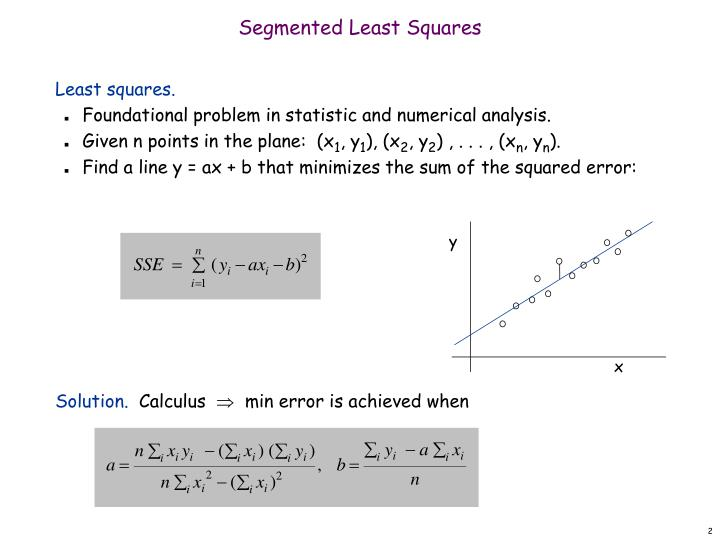

## Least Squares - analytical solution

In [ ]:
n = len(x)
beta_1 = ((n*jnp.sum(x*y) - jnp.sum(x)*jnp.sum(y))
          /
            (n*jnp.sum(x**2) - jnp.sum(x)**2)
)
beta_0 = (jnp.sum(y) - beta_1*jnp.sum(x))/n

#### Values of the fit

In [ ]:
print(f"beta_0: {beta_0:.2f}")
print(f"beta_1: {beta_1:.2f}")



Very close to the expected $b=2.0$ and $m=3.0$!

In [ ]:
plt.scatter(x, y, label='Data', color='black')
plt.plot(x, 3*x + 2, color='green', label='Real L,ine')
plt.plot(x, beta_1*x + beta_0, color='red', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

The real and fitted lines are right on top of each other!

## Was that ML?

1. We had some data
1. We had a function with some parameters
1. Using a procedure, the computer _taught_ itself the parameters

The joke is that Machine Learning is just a function fit, in the extreme!

* With 10's of thousands of data points.
* With complex functions with millions of parameters
* With a figure of merit that tells you when the function is making a good match to the data.

## Some Non-Nural Net ML Techniques

<div>
<img align="right" src="figs/energy-calorimeter.png" width=350>
</div>

### We think of Nural Nets as being the default ML technique.

* True, but they are expensive and slow to train
* But can learn very sophisticated functions
  *  Is that a cat or a dog in that `png`?
  *  Cluster jet energies in a detector
* Best when working with low-level data
  * Detector readouts
  * Large amounts of data (like 20 or 30 tracks, etc)

### Simpler Techniques

* Support Vector Machines, Boosted Decision Trees, etc.
* Best when working with high-level features
  * A picture containing a cat and a dog is likely to be a pet care facility?
  * Are these two jets and one electron going to be part of a top-quark decay?

### Support Vector Machine (linear)

1. Decision boundary: $wx - b = 0$
2. Optimize w and b to maximize separation in existing data

<div align=center>
<br>
    <img src="figs/SVM_margin.jpg" width="350"/>
<br>
</div>

### Decision Tree

<div>
<img align="right" src="figs/DecisionTree.png" width="250"/>
</div>

- Extend cut-based selection
    - Many events do not have all  
    characteristics of signal/background
    - Try not to rule out events  
    failing a particular criterion
- Keep events rejected by one  
criterion and see whether other  
criteria could help classify them properly
- __Binary trees__ can be built with  
branches splitting into many sub-branches

NOTE: this contains an impossible branch!

### Decision Tree Example

<div>
<img align="right" src="figs/Decision_Tree_-_survival_of_passengers_on_the_Titanic.jpg" width="350"/>
</div>

- Tree of survival of Titanic passengers  
"sibsp" = number of spouses/siblings
- Probability of survival & percentage  
of observations in the leaf
- Summary: chances of survival good if 
    - a female 
    - a male <9.5 years & <3 siblings

### Parameters of a BDT
<img align="right" src="figs/BDT_AlgoExample.png" width="350"/>

- Number of estimators / trees T
- Max Depth
- Learning rate
- Min events per leaf
- Bagging
- Random subset of features per cut
- Pruning
- Treatment of categorical variables
###### Popular algorithms are XGBoost, LightGBM, etc

### Boosting (the B of BDT)

<img align="right" src="figs/BDT_Boosting.png" width="350"/>

- Adaptive Boosting __AdaBoost__
    - combines multiple weak  
    learners (single split)  
    into a single strong learner  
- Gradient Boosting __GradBoost__  
    - Minimise overall loss with  
    each additional tree

## Our First Exercise

* Boosted Decision Tree
* Using the popular BDT library `xgboost`

We will separate Higgs decays from background in the $2e2\nu$ channel

## Day 2

* ML with Neural Networks
    * Use this [new link to open binder](https://binderhub.ssl-hep.org/v2/gh/research-software-collaborations/courses-hsf-india-december2023/HEADgpu_false)!
    * It is updated in indico!
<br>
Some questions from yesterday:

* What are mcWeights? And why are they negative sometimes? Why do we care about weights? Why do we care about the relative weights in the signal and background?
    * See Rafael's session on Simulation Techniques
    * Can you use negative weights in training?
        * Yes - just make sure you have enough positive weights along with the negative weights.

* What does `dfail.describe` do?
* Why do we do `n_lep == 2`?
* Why do we look at the correlation between features?

## Test & Training & Validation Training Sets

What if the NN learns about every single event in the training dataset?

<br>
Bias!!!
<br>
(this is bad)
<br>

* Training dataset - the NN or BDT learns on this data.
* Validation Dataset
  * We use this to make sure the the NN isn't over-fitting/over-learning the training dataset.
  * Use this to determine which hyper-parameter set to take (which introduces a bias)
* Test Dataset - Test the final NN on an unseen dataset
  * NO decisions are made on this dataset!

How about relative sizes
* Make the training dataset as large as you can
* The test and validation - same size?
  * Large enough to not be subject to statistics

**Remember:** You can't use training/validation datasets downstream in your analysis!!
* Use Even/Odd event number trick.

# Neural Networks

Lets start using the formalism from before. We have a set of data $x_i$ and a function $f$ that we'd like the following to hold true for:

$y_i = f(x_i, \beta)$

$f(x_i)$ is the neural network.

* Complex function that can describe $y_i$ given $x_i$
* Has properties that make it possible to solve for $\beta$.

And finally a loss function (like our least-squares):

$L(y_i, f(x_i, \beta))$

## Gradient Decent

We use the gradient decent algorithm to iteratively solve for $\beta$.

1. Evaluate the gradient of $L$ ($\nabla L$) for $x_i$ and $y_i$ for some vector of $\beta$.
1. Adjust $\beta$ by some factor times the gradient.

This will **slowly** move you towards the minimum, where $\frac{\delta L}{\delta \beta} = 0$.

<img src="figs/GD_Diagram.png" width="450">


## The Gradient

Programmatically, calculating the gradient is the hardest thing to do. Which is why we use frameworks like JAX, PyTorch, and TensorFlow. For an example, lets try a super simple function.

In [ ]:
def x2(beta):
    x, y = beta
    return x**2 + y**2

print(f'x2(1, 1)= {x2((1,1))}')
print(f'x2(2, 2)= {x2((2,2))}')
print(f'x2(3, 3)= {x2((3,3))}')

<br>

The `grad` function in JAX will take the gradient of the function. A lot of magic happens:

* A *tape* of the function is recorded.
* JAX replays the tape and takes the derivative of every operation
* Applies the product rule. A lot.

In [ ]:
grad_of_x2 = jax.grad(x2)

print(f'grad_of_x2(1, 0)= {grad_of_x2((1.0,1.0))}')
print(f'grad_of_x2(2, 0)= {grad_of_x2((2.0,2.0))}')
print(f'grad_of_x2(3, 0)= {grad_of_x2((3.0,3.0))}')

* The expected values for the derivative of $x^2 \rightarrow 2x$
* Note that it takes the derivative for each of the arguments - so we get it w.r.t both $x$ and $y$!

## Gradient Descent Straight Line Fit

Lets go back and use this technique to apply to the straight line data from earlier.

In [ ]:
def network(beta, x):
    b0, b1 = beta
    return b0 + b1*x

In [ ]:
def loss(params, x, y):
    y_pred = network(params, x)
    return jnp.mean((y_pred - y)**2)

Here we define our *network* and *loss* function

* Note the loss function is just the least squares function from before.
* Note how nicely we can look at this and see what we are doing - nothing like the analytical function above!

## The Gradient

Now that we know what JAX is going to do, this is a bit anti-climatic.

But - this is a much more sophisticated function that the previous simple `x2`!
* So we should still be impressed!

In [ ]:
grad_of_loss = jax.grad(loss)

`grad_of_loss` is a function that calculates the gradient of `loss` for all the data w.r.t. the parameters for the straight line function ($m$ and $b$).

## Update the parameters

Each iteration we calculate the gradient, and adjust the parameters.

In [ ]:
def one_epoch(beta, x, y, i_epoch):
    g = grad_of_loss(beta, x, y)
    beta -= 0.1*g
    print(f'Step {i_epoch}, loss {loss(beta, x, y)}')
    return beta

Note the `0.1`:

* This is the _learning rate_.
* Adjust it to help converge more or less quickly
* Too large can mean you miss the minimum
* There are sophisticated algorithms that calculate different learning rates on the fly.

## Training

Lets loop 10 times:

In [ ]:
beta = jnp.array([1.0, 1.0])

for i_epoch in range(10):
    beta = one_epoch(beta, x, y, i_epoch)

In [ ]:
print(f"Final parameters: {beta}")

This was after only 10 epochs, but we can see that we are getting close here!

## Training History

Lets do a longer training and track the parameters so we can see how they converge.

In [ ]:
beta = jnp.array([1.0, 1.0])
beta_history = [beta]
for i in range(50):
    beta = one_epoch(beta, x, y, i)
    beta_history.append(beta.copy())

At the end the loss is hardly changing - so likely the parameters are hardly changing either!

## Fit Results

In [ ]:
nn_beta_0, nn_beta_1 = beta
print(f"beta_0 (b): {nn_beta_0:.2f} - least squares: {beta_0:.2f}")
print(f"beta_1 (m): {nn_beta_1:.2f} - least squares: {beta_1:.2f}")

In [ ]:
# Extract the first coordinate from param_history
first_coordinate = [b[0] for b in beta_history]

# Plot the first coordinate as a function of the epoch number
plt.plot(range(len(first_coordinate)), first_coordinate)
plt.xlabel('Epoch Number')
plt.ylabel(r'$\beta_0$ - Offset Coordinate')
plt.title('Offset Coordinate vs. Epoch Number')
plt.show()


Seems like we might need only 20 training epochs...

In [ ]:
# Extract the first coordinate from param_history
first_coordinate = [b[1] for b in beta_history]

# Plot the first coordinate as a function of the epoch number
plt.plot(range(len(first_coordinate)), first_coordinate)
plt.xlabel('Epoch Number')
plt.ylabel(r'$\beta_1$ - Slope Coordinate')
plt.title('Slope Coordinate vs. Epoch Number')
plt.show()


Same here...

## Training

This algorithms is what is at the heart of all NN training!!

* Simple set of steps
* Lots of things can be done to optimize this training (see later slides)
* However - not how much slower it was to arrive at the final values of the parameters!
  * Though it was nice to write out the loss function and network as we would "expect" them.

### What are Neural Networks?

<img align="right" src="figs/Neural_network_example.svg" width="200"/>

- A Neural Network (NN) is function whose computational  
graph mimics the structure of biological neural systems
- It is defined by:
    - Architecture (computational graph)
    - Parameters (weights in connections)
    ###### Each circle is called a node or a neuron

### What does a NN actually look like?
A NN is a function, so it has an input and an output
1. Linear transformation (including bias)  
Can be summarized by a matrix of weights, $W$
2. Activation function
(some non-linear function applied at each node) 
Common examples include:  
$\sigma(z) = \frac{1}{1+e^{-z}}$  
$\text{ReLU}(z) = \text{max}(0,z)$  
$\text{Softplus}(z)=\text{ln}(1+e^z)$  
(activation function here is applied element-wise)

### Inside a Neural Network

<div align=center>
<br>
    <img src="figs/NN_Diagram.jpg" width="600"/>
<br>
</div>

This step is repeated multiple times  
x(# of Nodes) x(# of Layers) x more...   
Depends on the architecture of the neural network 

### Universal Approximation Theorem (UAT)

A NN with sufficiently many nodes can approximate any function with an arbitrarily small error!

<div align=center>
    <img src="figs/UAT.png" width="600"/>
</div>

   ##### Early proofs:  G. Cybenko, “Approximation by Superpositions of a Sigmoidal Function” (1989), K. Hornik, et al, “Multilayer Feedforward Networks are Universal Approximators” (1989), K. Horink, “Approximation Capabilities of Multilayer Feedforward Networks” (1991) 

### Visualizing the Universal Approximation Theorem
Example: single-layer, wide sigmoidal NN

<div align=center>
    <img src="figs/NN_UATFig.png" width="800"/>
</div>    

    - Linear transform + sigmoid: can approximate ~1 local point
    - Many sigmoids combined ⇒ can approximate many points
    - Generalizable to higher dimensions

### Visualizing How NN’s Work: A Simple Example

<img align="right" src="figs/Neural_network_example_2.png" width="325"/>

- Conventionally, <span style="color:orange">__feature extraction__</span> is done  
by humans with domain-/problem-specific expertise
    - Experience, *a priori* physics knowledge, etc.
    - Expensive, difficult
- <span style="color:green">__Linear models__</span> are easy to solve, but limited
    - Closed form solution or convex optimization
    - But linear, obviously...
- __NNs can perform both and learn based on data__


### Visualizing How Neutral Networks Work
- Simple NN training live on browser: [Link](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.003&regularizationRate=0&noise=0&networkShape=3&seed=0.13116&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

<div align=center>
    <img src="figs/NN_Visualization.png" width="600"/>
</div>

- Visualizing hidden layers & decision boundaries: [Link](http://srome.github.io/Visualizing-the-Learning-of-a-Neural-Network-Geometrically/)


### Approaches to Learning and Supervision

<img align="right" src="figs/Supervision.png" width="200"/>

- __Supervised learning__  
    - Training data-set  
    $ T = \{(x_i, y_i) | i=1, ..., m\} $
    - Known inputs & corresponding outputs  
    - MC simulation with known truths, etc.  
- __Unsupervised learning__  
    - Training data-set  
    $ T = \{x_i| i=1, ..., m\} $  
    - Just inputs, true outputs unknown  
    - LHC data, anomaly detection, etc.  

### Approaches to Learning and Supervision
- __Supervised learning__  
- __Unsupervised learning__  
- __Semi- or weakly supervised learning__  
    - Somewhere in between supervised & unsupervised  
    - Partial information like mean output values or outputs known for subset of samples

### Training Neural Networks

- To train NNs in supervised learning, we need: 
    - Training data-set: $ T = \{(x_i, y_i) | i=1, ..., m\} $
    - Known inputs & corresponding outputs 
- Loss function: $ L(y',y) $
    - How far a prediction $ y’ = NN(x) $ is from true $y$ 

With these, learning is now an __optimization problem__, given $T$, find the NN parameters that minimize the mean loss:

$$L_{\text{overall}} = \frac{1}{m} \sum^m_{i=1}L(NN(x_i),y_i) $$

### How to train a NN: Backpropagation

- Optimize using gradient-descent type methods
- $ L(y',y) $ is differentiable & NN is differentiable

<img align="right" src="figs/Backpropagation.png" width="550"/>

$ \rightarrow $ Gradients can be propagated backwards recursively with Chain Rule of Derivatives


$$\frac{\partial L}{\partial h_j} = \frac{\partial L}{\partial h_{j+1}}\frac{\partial h_{j+1}}{\partial h_j} $$


###  Training NNs: Gradient Descent (GD) Algorithm
1. Initialize NN with random parameters  
$\rightarrow$ typically standard normal dist.

2. Make prediction $y_i’ = NN(x_i)$ over training data $T$  
$\rightarrow$ forward pass through NN

3. Compute the loss and backpropagate the gradient  
$\rightarrow$ backward pass through NN

4. Update parameters by: gradient $\times$ learning rate

5. Repeat many times...

      Steps 1-4 are called an epoch, \# of epochs = how long a NN is trained for

### Practice for Efficient & Successful Training
<img align="right" src="figs/GlobProb.png" width="320"/>

One of the main difficulties in training NNs is that there can be __many local minima and saddle points in high dimensions__
- Solutions / Work-arounds
    - Stochastic gradient descent
    - More advanced optimizers
    - Regularization techniques

### Stochastic Gradient Descent & Mini-Batch
<img align="right" src="figs/BGD_Diagram.png" width="450"/>

Stochastic Gradient Descent (SGD)  
    - Instead of one update per full $T$ (one batch), update per every sample  
    - High variance, but a lot more steps  
    - $|T|$ updates per epoch  

<img align="right" src="figs/GD_Diagram.png" width="450"/>

Mini-batch gradient descent  
    - Update per mini-batch of size $B$  
    - Compromise between full batch GD & SGD  
    - $|T| / B$ updates per epoch  

SGD = Mini-batch GD with $B = 1$  

### More Optimizers: Sparse / Vanishing gradients in certain parameters
- Mitigate scale difference between different parameters  
- Adaptive step sizes for different params. by keeping track of gradient sizes  
    ###### Update equation for __AdaGrad__ method

<div align=center>
    <img src="figs/AdaGrad.png" width="400"/>
</div>

### More Advanced Optimizers: Momentum in certain directions
- Keep info. about previous updates
- This acts like “momentum”  
    ###### Update equation for SGD with momentum

<img align="right" src="figs/movie10.gif" width="500"/>

$V_t = \beta V_{t-1} + \alpha \nabla_W L(W-\beta V_{t-1}, X, y)$  
$W = W-V_t$


- Other popular modern optimizers RMSProp, Adam, etc.

### Validation of NN Training

- When training a NN, we want to quantify its performance $\rightarrow$ measures are mean loss, accuracy, etc. smaller = better
    - Use of __training data-set__ to quantify performance is prone to bias
- __Validation data-set__ $\rightarrow$ subset of data
    - Not used for calculating gradients, used for monitoring purposes
- __Test data-set__ $\rightarrow$ subset of data
    - Blinded during training, only for final performance measure

<div align=center>
    <img src="figs/ValidationDatasets.png" width="350"/>
</div>

###  Training Progress & Overfitting
- Plot loss, accuracy, etc. over epochs, __both training & validation losses__  
- __Overfitting to training set__ decreasing training loss, but not validation loss, learning training-set-specific biases
    - Solution: __stop training, different NN model, different optimizer, etc__
    
<table><tr>
<td> <img src="figs/Overfitting_1.png" alt="Drawing" style="width: 350px;"/> </td>
<td> <img src="figs/Overfitting_3.png" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>

###  Training Progress & Overfitting
- Plot loss, accuracy, etc. over epochs, __both training & validation losses__  
- __Overfitting to training set__ decreasing training loss, but not validation loss, learning training-set-specific biases
    - <font color='blue'>Concept is simple, but noticing it in practice is more subtle</font>
<table><tr>
<td> <img src="figs/Overfitting_2.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="figs/Overfitting_3.png" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>
    


 ### Performance Measures for Classification Problems
 
Consider binary classification example

|       | Actually Positive (P) | Actually Negative (N)|
| ----------- | ----------- | ----------- |
| Predicted Positive      | TP      | FP |
| Predicted Negative   | FN        | TN |

- __Accuracy, ACC = (TP + TN) / (N + P)__  
- __Signal efficiency $\epsilon_\text{S} = $ TP / P__ also called true positive rate (TPR), sensitivity  
- __Background efficiency $\epsilon_\text{B} = $ FP / N__ also called false positive rate (FPR) 
- In High Energy Physics (HEP), often use __background rejection__ instead bkg. rej. $= 1 / $bkg. eff. 
    - Bkg. rej. of 100 = 1 in 100 background events pass as fake positive

 ### ROC Curve (Receiver Operating Characteristic)
- Plot of true positive rate/signal efficiency against false positive rate/background efficiency
- In HEP, often use $1/\epsilon_B$ against $\epsilon_S \rightarrow$ for 70% signal efficiency, 1000 bkg. rej 
    
<table><tr>
<td> <img src="figs/PerfMeasures_2.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="figs/PerfMeasures_1.png" alt="Drawing" style="width: 350px;"/> </td>
</tr></table>


### Flavors of NN Architectures: Convolutional Neural Network (CNN)
NN input not limited to 1-dim. vector, great for images & pixelated geometries
- Striding filters across axes
    - Sliding window, convolutional integral
    - Each filter = weight matrix + activation
- Understands local geometry, translational invariance

<div align=center>
    <img src="figs/CNN.png" width="600"/>
</div>

### CNN Example: Jets in ATLAS
- Calorimeter is inherently a pixelated detector
- Value in each pixel = energy deposit (ECAL + HCAL)
- Good for finding clusters

<div align=center>
    <img src="figs/JetImages.png" width="600"/>
</div>

### Recurrent Neural Network (RNN)

- NN can handle variable length sequences
- Previous outputs are re-entered as inputs
- Understands order and context (has memory)
- Great for natural languages, time-series prediction

<div align=center>
    <img src="figs/RNN.png" width="700"/>
</div>


### RNN Example: Jet Flavor in ATLAS
- Jet = series of tracks, topoclusters, PFlow, etc.
- Each input = particle four-vector
- Needs some ordering (e.g. leading-$p_T$)

<div align=center>
    <img src="figs/figs_RNNIP_1.png" width="600"/>
</div>

### Deep Sets - Enforcing permutation invariance
- RNN is requires an order, use sets instead of sequences (no preferred order) i.e. permutation-invariant
- __Deep Sets__
<div align=center>
    <img src="figs/DeepSets.png" width="600"/>
</div>
<div align=center>
    <img src="figs/DeepSets_Diagram.png" width="800"/>
</div>

### Deep Sets Example: Jet Flavor in ATLAS
- Jet = series of tracks, topoclusters, PFlow, etc.
- Each input = particle four-vector
- No order needed

<div align=center>
    <img src="figs/DeXTer_DeepSets.png" width="800"/>
</div>

### Generative Adversarial Network (GAN)

- Allows to combine multiple NNs for more complicated tasks
- Two NNs: generator G and discriminator D
- __Compete when training: one fakes, one distinguishes__
- Eventually, G becomes good at __generating realistic data__

<div align=center>
    <img src="figs/GAN.png" width="800"/>
</div>

### GAN Example: Jet Simulation
- Generate realistic jets in calorimeters
- Computationally cheap, fast alternative to full MC

<div align=center>
    <img src="figs/CaloGAN.png" width="600"/>
</div>

## Combine for fun and profit (science!)

<br>

<img src="figs/calratio-rnn.png">

### Rise of AI / ML / DL: Just a Regression?

- Sure, a NN is a universal approximator...
- But there are many more!
    - Taylor series (for smooth functions)
    - Fourier series , Bernstein polynomial (over bounded regions)
- __So, is the NN just another way of fitting a function? ⇒ Yes, but...__

### When is / What makes a NN better?
- __With high-dim. input data__
    - Polynomial function would scale like $n^k$
    - NNs known to scale more efficiently, in some cases polynomially (shown by empirical successes)
    - NN structure & backprop. ⇒ easier to optimize 
- __Easy to train and use__
    - Surprisingly simple nowadays
    - No / little human engineering

###  Hardware: Graphics Processing Unit (GPU)
- Single instruction, multiple data (SIMD) architecture
- Specialized for parallel, repetitive tasks like matrix multiplication

<div align=center>
    <img src="figs/GPU_CPU.png" width="1000"/>
</div>

###  Hardware: Tensor Processing Unit (TPU)
- Google proprietary technology 
- Application specific ASIC designed for high volume of low precision computation 

<div align=center>
    <img src="figs/Tensor_Processing_Unit_3.0.jpg" width="300"/>
</div>

- Specialized for NN computation — matrix mult, convolution, and activation

__Other NN-specific hardware options are rising in popularity__



###  Hardware: Computational Resources
- Faster Internet—connection is less of a bottleneck
- Cloud & sever availability made high-performance computing more available for all
- Amazon, Microsoft, Google, national computational facilities, etc.

<table><tr>
<td> <img src="figs/TIFR_Computing.png" alt="Drawing" style="width: 140px;"/> </td>
<td> <img src="figs/LHCOne_India.png" alt="Drawing" style="width: 700px;"/> </td>
</tr></table>

### Outlook for Physicists
- AI/ML very active area with many applications to Particle Physics
- Lot of knowledge/resources still to __absorb__ from broader AI/ML community
    - __Active communication & collaboration__ between academia & industry
- Continue ML application R&D in data analysis
    - Replace existing heuristic-based tools
    - Update with newer methods
    - Train/educate more physicists with ML-fluency

### Newer / less familiar research directions - Many areas!
- ML-specific hardware (e.g. low-level trigger with FPGAs)
<div align=center>
    <img src="figs/HeterogeneousArchitectures.png" width="300"/>
</div>
- Simulation (GAN’s, differentiable simulators, diffusion models)
- Design and operation of experiments
- Resource management (in large servers and data storage centers)

## Gordon's 5-Stages of ML-Grief

1. Understand your data
    * ML will find all possible discrepancies. Even ones you can't see.
    * Plot everything you are feeding the network! Really ask - does it make sense?
1. Understand what your ML algorithm is doing
    * Don't trust it further than you can throw a ... well... anything heavy.
    * Over training isn't usually what will get you
    * Picking up on non-physical differences in the training samples... will.
    * If the results is too good to be true...
1. Automate Everything
    * The process is very iterative and you'll constantly be going back to previous steps
    * Automation slows you down initially, but is a speed multiplier later on!
1. Use a search-engine/AI/GPT to help you
    * Almost everything basic has been done before. Copy!
    * Even advanced things have been done.
    * Use google, stackoverflow, ChatGPT - whatever you have access to.
    * While it is useful to learn the basics, in the end, you want to do science, not ML research
        * unless you do...
1. Also, Understand your data

### Classifiers at the Large Hadron Collider - Topic of the Tutorial

<img align="right" src="figs/HWW.png" width="400"/>

- Typical use of classifiers  
is to distinguish signal from background
- Treat the output as observable,  
measure theory parameters using a  
maximum likelihood fit over several bins
    - Compare various simulations to data  
    to find the best fit $\mu$ where the  
    entries are $N = \mu S + B$

### Discriminating Signal & Background 
- Measuring the $H \rightarrow WW \rightarrow 2\ell 2\nu$ process 
    - One of the main decay modes of the Higgs boson
    - Analysis has large backgrounds, benefits from ML methods
    - Hands on examples use a __BDT__ and a __NN__ discriminator

<table><tr>
<td> <img src="figs/HWW_Feynman.png" alt="Drawing" style="height: 200px;"/> </td>
<td> <img src="figs/WW_Feynman.png" alt="Drawing" style="height: 200px;"/> </td>
<td> <img src="figs/ttbar_Feynman.png" alt="Drawing" style="height: 200px;"/> </td>
</tr></table>


### Acknowledgements, Links to Materials / Images Borrowed

Many thanks to Rafael Coelho Lopes De Sa, Sanha Cheong, Aishik Ghosh, Michael Kagan, Yann Coadou, Yuan-Tang Chou, Brij Kishor, David Rousseau, James Catmore

https://www.researchgate.net/figure/Figure-Artificial-Intelligence-Machine-Learning-and-Deep-Learning_fig3_340684782

https://en.wikipedia.org/wiki/Neural_network#/media/File:Neural_network_example.svg 

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#/media/File:KnnClassification.svg 

https://en.wikipedia.org/wiki/Support-vector_machine#/media/File:SVM_margin.png 

https://towardsdatascience.com/introduction-to-math-behind-neural-networks-e8b60dbbdeba 

https://towardsdatascience.com/representation-power-of-neural-networks-8e99a383586 

https://towardsdatascience.com/back-propagation-simplified-218430e21ad0 

https://www.researchgate.net/figure/Gradient-Descent-Stuck-at-Local-Minima-18_fig4_338621083 

https://towardsdatascience.com/neural-network-optimization-7ca72d4db3e0 

https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461

https://github.com/Jaewan-Yun/optimizer-visualization

https://www.linkedin.com/pulse/supervised-vs-unsupervised-learning-whats-difference-smriti-saini/ 

https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/ 

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://indico.tifr.res.in/indico/getFile.py/access?contribId=41&sessionId=15&resId=0&materialId=slides&confId=8398

https://arxiv.org/pdf/1712.10321.pdf

https://cds.cern.ch/record/2825434/files/ATL-PHYS-PUB-2022-042.pdf

https://arxiv.org/pdf/1511.05190.pdf

https://indico.in2p3.fr/event/26179/contributions/106549/attachments/70511/100013/SoS_DT220517.pdf

https://atlas.web.cern.ch/Atlas/GROUPS/PHYSICS/PAPERS/HIGG-2021-20/